#Grae prediction using Parallel Random Forest
 
    Grading is necessary tool for measure outcome of the sudying process. Unsuccessful lerning process may depend on many factors such as student attenction, teacher and background knowledge. In many academic instituetions, the prerequisite subjects are required before registering some particular subjects. In this project, we attempt to investigate the relationship between prerequisite grades on a grade of the paricular subject. We have aquired a anonymous enrolment records of computer science students from the registrar of Thammasat University. The records have been constantly collected for 4 years consisting of over 28,272 records.

In [25]:
import pandas as pd
import numpy as np
print pd.__version__
%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
df_csv = pd.read_csv('CS_table_No2_No4_new.csv',delimiter=";",
                      skip_blank_lines = True, error_bad_lines=False)
df_csv=df_csv.dropna()

0.18.0


In [26]:
print df_csv.head() #get first 5 records

   STUDENTID  ACADYEAR  SEMESTER  CAMPUSID COURSEID CAMPUSNAME  CURRIC  \
0     316644      2552         1         2    CS101    RANGSIT     521   
1     316644      2552         1         2    CS102    RANGSIT     521   
2     316644      2552         1         2    EL171    RANGSIT     521   
3     316644      2552         1         2    SC135    RANGSIT     521   
4     316644      2552         1         2    SC185    RANGSIT     521   

                          COURSENAME  SECTIONGROUP  CREDIT GRADE  
0                DISCRETE STRUCTURES         10001       3     C  
1  COMPUTER PROGRAMMING FUNDAMENTALS         20301       4     C  
2                   ENGLISH COURSE 2        100003       3     D  
3                    GENERAL PHYSICS         80001       3     F  
4        GENERAL PHYSICS  LABORATORY          5401       1     C  


In [27]:
print df_csv.tail() #get lat 5 records

       STUDENTID  ACADYEAR  SEMESTER  CAMPUSID COURSEID CAMPUSNAME  CURRIC  \
31332     447243      2557         1         2    EL070    RANGSIT     561   
31333     447243      2557         1         2    MA211    RANGSIT     561   
31334     447243      2557         1         2    ST216    RANGSIT     561   
31335     447243      2557         1         2    TH161    RANGSIT     561   
31336     447243      2557         1         2    TU154    RANGSIT     561   

                               COURSENAME  SECTIONGROUP  CREDIT GRADE  
31332                    ENGLISH COURSE 1        650001       3    U#  
31333                          CALCULUS 1        650001       3     F  
31334  STATISTICS  FOR  SOCIAL  SCIENCE 1        650001       3     F  
31335                          THAI USAGE        650002       3     F  
31336           FOUNDATION OF MATHEMATICS        650001       3     F  


#Data minning process
The normal procedures for data mininng are the following:
* data cleaning
* data transformation
* training
* evaluation

##Drop unnecessary data
    Some column are unnecessary for the prediction. We can drop them by using df.drop()
```python
        df_csv.drop(["column_name"])
```

In [28]:
column_name=df_csv.columns.values
print column_name
for i in column_name:
    print "datatype of column {} is {}.".format(i,df_csv[i].dtype)

['STUDENTID' 'ACADYEAR' 'SEMESTER' 'CAMPUSID' 'COURSEID' 'CAMPUSNAME'
 'CURRIC' 'COURSENAME' 'SECTIONGROUP' 'CREDIT' 'GRADE']
datatype of column STUDENTID is int64.
datatype of column ACADYEAR is int64.
datatype of column SEMESTER is int64.
datatype of column CAMPUSID is int64.
datatype of column COURSEID is object.
datatype of column CAMPUSNAME is object.
datatype of column CURRIC is int64.
datatype of column COURSENAME is object.
datatype of column SECTIONGROUP is int64.
datatype of column CREDIT is int64.
datatype of column GRADE is object.


In [29]:
df_csv.drop(['CAMPUSID','CAMPUSNAME','COURSENAME','CURRIC','SECTIONGROUP','CREDIT'],
            axis=1, inplace=True)
column_name=df_csv.columns.values
print column_name
for i in column_name:
    print "datatype of column {} is {}.".format(i,df_csv[i].dtype)

['STUDENTID' 'ACADYEAR' 'SEMESTER' 'COURSEID' 'GRADE']
datatype of column STUDENTID is int64.
datatype of column ACADYEAR is int64.
datatype of column SEMESTER is int64.
datatype of column COURSEID is object.
datatype of column GRADE is object.


##Data cleaning
    There are some records having NAN ann invalid data. We need to fix or remove them.

C     5075
C+    4939
B     4228
B+    3411
A     3187
D+    2600
D     1792
W     1690
F     1062
S#     206
S       36
U       27
U#      19
Name: GRADE, dtype: int64


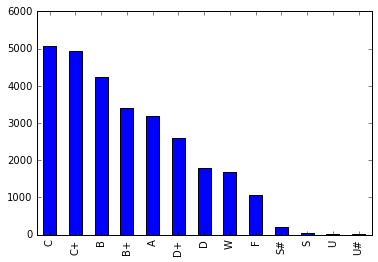

In [30]:
df=df_csv.copy()
myhist=df["GRADE"].value_counts()
print myhist
myhist.plot(kind='bar')

##converting category to numeric data


In [31]:
grade_cn={'':0, 'U#':1, 'U':2, 'S#':3, 'S':4, 'W':5, 'F':6, 'D':7, 'D+':8, 'C':9, 'C+':10, 'B':11, 'B+':12, 'A':13}
grade_list=['', 'U#', 'U', 'S#', 'S', 'W', 'F', 'D', 'D+', 'C', 'C+', 'B', 'B+', 'A']
[grade_cn[i] for i in grade_list]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [32]:
df2=df.copy()
df2 = df2.fillna(0)
df2 = df2.replace(grade_list, [grade_cn[i] for i in grade_list] )


In [33]:
myhist=df["GRADE"].value_counts()
print myhist
myhist2=df2["GRADE"].value_counts()
print myhist2

C     5075
C+    4939
B     4228
B+    3411
A     3187
D+    2600
D     1792
W     1690
F     1062
S#     206
S       36
U       27
U#      19
Name: GRADE, dtype: int64
9     5075
10    4939
11    4228
12    3411
13    3187
8     2600
7     1792
5     1690
6     1062
3      206
4       36
2       27
1       19
Name: GRADE, dtype: int64


In [34]:
df2["TERM"]=10*df2["ACADYEAR"]+df2["SEMESTER"]
df3=df2.copy()
df3.drop(["ACADYEAR","SEMESTER"],axis=1, inplace=True)

In [35]:
print df3.head()
print df3.tail()

   STUDENTID COURSEID  GRADE   TERM
0     316644    CS101      9  25521
1     316644    CS102      9  25521
2     316644    EL171      7  25521
3     316644    SC135      6  25521
4     316644    SC185      9  25521
       STUDENTID COURSEID  GRADE   TERM
31332     447243    EL070      1  25571
31333     447243    MA211      6  25571
31334     447243    ST216      6  25571
31335     447243    TH161      6  25571
31336     447243    TU154      6  25571


We need to create a new dataframe that has pattern, where pattern is a set of grades from studied subjects.

In [36]:
#df4=df3[0:20].copy()
df4=df3

In [37]:
#create a new data frame
df5=df4.copy()
for c in df5.COURSEID.value_counts().index:
    df5[c]=pd.Series(np.zeros(df5.shape[0],dtype=int),index=df5.index)
#reindex the columns
cname=df5.columns[0:4].values.tolist() + sorted(df5.columns[4:].values)
df5=df5.reindex_axis(cname, axis=1)

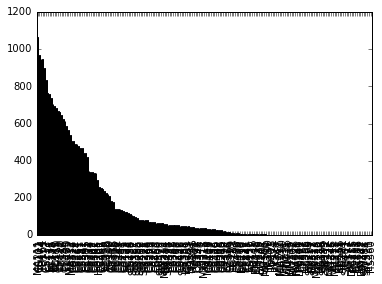

In [38]:
df5.COURSEID.value_counts().plot(kind='bar')

In [39]:
%%timeit -n1
for i, ri in df5.iterrows():
    dfx=df4[ (df4["STUDENTID"] == ri["STUDENTID"]) & (df4["TERM"] < ri["TERM"]) ]
    if(dfx.shape[0]):
        for j,rj in dfx.iterrows():
            df5.loc[i,rj["COURSEID"]]=rj["GRADE"]

1 loops, best of 3: 15min 29s per loop


In [40]:
df5.to_pickle("df5.pkl")
#df = pd.read_pickle("df5.pkl")

In [41]:
df6 = pd.read_pickle("df5.pkl")

In [42]:
df6

,STUDENTID,COURSEID,GRADE,TERM,AN201,AS171,AS177,AS178,AT207,AT316,AT326,AT336,AT346,AT366,BA291,CF366,CF367,CJ315,CJ316,CJ317,CJ321,CN342,CS101,CS102,CS105,CS111,CS115,CS211,CS213,CS214,CS215,CS222,CS223,CS231,CS251,CS261,CS275,CS281,CS284,CS285,CS286,CS288,CS289,CS295,CS296,CS297,CS300,CS301,CS302,CS311,CS314,CS326,CS328,CS341,CS342,CS348,CS356,CS359,CS365,CS366,CS367,CS374,CS377,CS385,CS386,CS387,CS388,CS395,CS396,CS397,CS398,CS399,CS401,CS402,CS407,CS408,CS409,CS426,CS427,CS429,CS446,CS447,CS449,CS456,CS457,CS459,CS467,CS469,CS479,CS486,CS487,CS488,CS489,CS496,CS499,DM201,DM207,DM215,EC210,EG241,EL070,EL171,EL172,EL202,EL231,EL295,EL395,ES256,ES356,ES456,FD211,FN211,GE225,GE311,HO201,HR201,HS266,HS269,HS356,HS360,IS201,JC200,JC201,JC260,JC281,JP171,JP172,LA209,MA211,MA212,MA216,MA217,MA221,MA332,MU100,MU130,MU135,MU202,MU275,MU277,MU278,MW313,MW314,MW318,NS112,NS132,PC286,PE240,PE245,PM215,PM235,PM236,PY211,PY217,PY218,PY226,PY228,PY237,PY267,RE333,RT326,SC123,SC135,SC173,SC185,SN212,SO201,ST216,ST218,SW111,SW212,SW213,SW214,SW221,SW222,SW223,SW224,SW335,SW365,SW366,SW467,SW475,SW478,SW486,SW489,TA395,TD436,TH161,TU100,TU110,TU111,TU115,TU116,TU120,TU122,TU130,TU153,TU154,TU156
0,316644,CS101,9,25521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316644,CS102,9,25521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,316644,EL171,7,25521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,316644,SC135,6,25521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,316644,SC185,9,25521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,316644,TH161,9,25521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,316644,TU154,7,25521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [43]:
import pickle
with open('grade_cn.pkl', 'wb') as pickleFile:
    pickle.dump(grade_cn, pickleFile, pickle.HIGHEST_PROTOCOL)

In [44]:
import pickle
with open('grade_cn.pkl', 'rb') as pickleFile:
    _grade_cn = pickle.load(pickleFile)

In [45]:
print grade_cn
print _grade_cn

{'': 0, 'A': 13, 'C': 9, 'B': 11, 'D': 7, 'F': 6, 'S': 4, 'U': 2, 'W': 5, 'S#': 3, 'U#': 1, 'C+': 10, 'D+': 8, 'B+': 12}
{'': 0, 'A': 13, 'C': 9, 'B': 11, 'D': 7, 'F': 6, 'C+': 10, 'S': 4, 'U': 2, 'W': 5, 'S#': 3, 'B+': 12, 'U#': 1, 'D+': 8}


In [46]:
df6.to_csv("df6.csv")

In [47]:
abc=df6["COURSEID"].value_counts()   
len(abc)

195

In [48]:
m20=abc[abc[:]>=20]
print m20
len(m20)

MA211    1068
CS102     966
CS101     948
TU154     946
TH161     899
CS111     834
CS213     765
EL171     760
SC135     740
PY228     705
EL172     697
SC185     686
TU110     666
CS223     664
TU120     648
ST216     623
CS284     616
EL295     588
TU130     567
MA212     539
MA332     509
CS314     509
CS222     490
CS214     488
CS261     481
CS251     471
CS281     470
CS341     443
EL395     442
CS301     421
CS311     343
CS374     339
CS302     338
CS401     333
CS342     332
CS105     298
HO201     257
CS395     256
CS402     248
CS365     237
EL070     229
AT326     221
TU100     210
CS289     182
CS385     181
AT316     142
CS326     141
TU122     141
CS288     140
CS487     138
         ... 
SW212      82
CS409      81
SW221      81
CS215      80
CS386      79
CS366      72
CS295      71
CS377      69
LA209      69
CS456      68
CS467      67
CS300      64
SW478      64
SW213      63
MW314      58
BA291      58
SW475      57
CS396      56
CS427      56
ES356      56
CS387 

110

In [49]:
mm=abc[abc[:]<20]
len(mm)

85

In [50]:
df6[df6["COURSEID"].isin(mm.index)].shape[0]

278

In [51]:
df6[df6["COURSEID"].isin(m20.index)].shape[0]

27994

In [52]:
278+27994

28272

In [53]:
df6.shape[0]

28272

In [54]:
df7=df6[df6["COURSEID"].isin(m20.index)]
df7.to_csv('df7.csv')

In [55]:
for m in m20.index:
    dfx=df6[df6["COURSEID"].isin([m])]
    dfx.to_csv("df_%s.csv"%m)

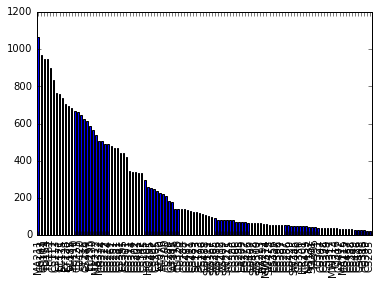

In [56]:
df7.COURSEID.value_counts().plot(kind='bar')